# LAB8 - TinyML

# Introduction

The purpose of this notebook is exploring the basics of TinyML. A classifier model will be developed for a device built using an Arduino board. The Irys dataset will be used, and decision tree forests will be used for classification.

Environment: Jupyter Notebook, WOKWI

Tools: Scikit Learn, Python, C, Arduino

# Arduino Project 

The device built using the Arduino board will be used to classify Iris flowers. The length and width of the Iris petals will be measured using slide potentiometers connected to the analog inputs of the Arduino (inputs A0 - A3). The LCD display (connected via I2C) will indicate the recognized class.
The project will be tested on the [wokwi.com](wokwi.com) platform, where you need to create an account and then select a blank project for the Arduino Mega board.

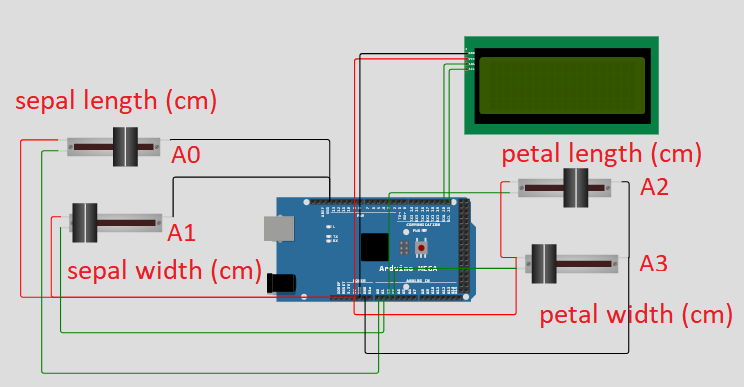

# Data processing in Arduino

* Wiring all the necessary components of the device.
* Preparation of the initial program based on the laboratory support files.
* Initialization of the device and connected display.
* Scaling the values read from the slide potentiometers to correspond to the range of each input feature.
* Writing out the feature vector on the serial port and visualizing it on a graph.
* Developing a classifier using the FogML library and porting the code to Arudino.
* Displaying the recognized class.

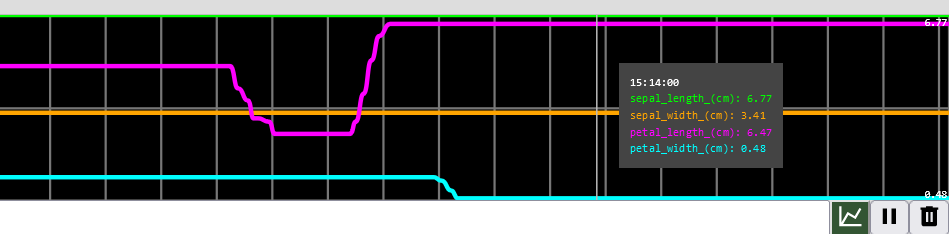


# FogML

The FogML library is used for, among other things, generating source code of ML models for devices with limited resources.

More information about the bibliteka in the Github repository - [FogML](https://github.com/tszydlo/FogML).

In [1]:
!pip install fogml

The device will use a classifier developed using a forest of decision trees (`RandomForestClassifier`) composed of 5 weak estimators. The learning process is simplified for the purposes of the class.

In [3]:
from sklearn import datasets, tree
from sklearn.ensemble import RandomForestClassifier

iris = datasets.load_iris()
X = iris.data
y = iris.target


clf = RandomForestClassifier()

clf.fit(X,y)

print( 'accuracy: ',clf.score(X,y))

accuracy:  1.0


# Data Scaling



On the Arduino, the ADCs have a resolution of 10bit and, in their default configuration, work for the 0-5V range.

The data from the sensors (potentiometers) should be scaled so that for each element of the feature vector the values obtained are in the `[min;max]` range corresponding to the range of features from the training set.

In [8]:
import numpy as np
def min_max(test_list):
  # Maximum and Minimum of each Column
  return [ (min(col), max(col) ) for col in test_list.T]

print(iris.feature_names)
print(min_max(X))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[(4.3, 7.9), (2.0, 4.4), (1.0, 6.9), (0.1, 2.5)]


Generating the classifier code in C. Then the generated source code file is transferred to the project for Arduino.

In [9]:
from fogml.generators import GeneratorFactory

factory = GeneratorFactory()

generator = factory.get_generator(clf)

generator.generate()

Generating C code snippet containing arrays of class and feature names. They will be used in the arduino project code. 

In [26]:
string_format = "char* classes[] = {{{}}};"

target_names = iris.target_names
cpp_target_names = string_format.format(", ".join('"{}"'.format(tg) for tg in target_names))
print(cpp_target_names)

string_format = "char* feature_names[] = {{{}}};"
feature_names = iris.feature_names
cpp_feature_names = string_format.format(", ".join('"{}"'.format(ft) for ft in feature_names))
print(cpp_feature_names)



char* classes[] = {"setosa", "versicolor", "virginica"};
char* feature_names[] = {"sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"};


# Result

The final step is to test the performance of the device for various sample input data resulting in the classification of Iris flowers.

Below: a screenshot showing the wiring and the recognized `virginica` class.

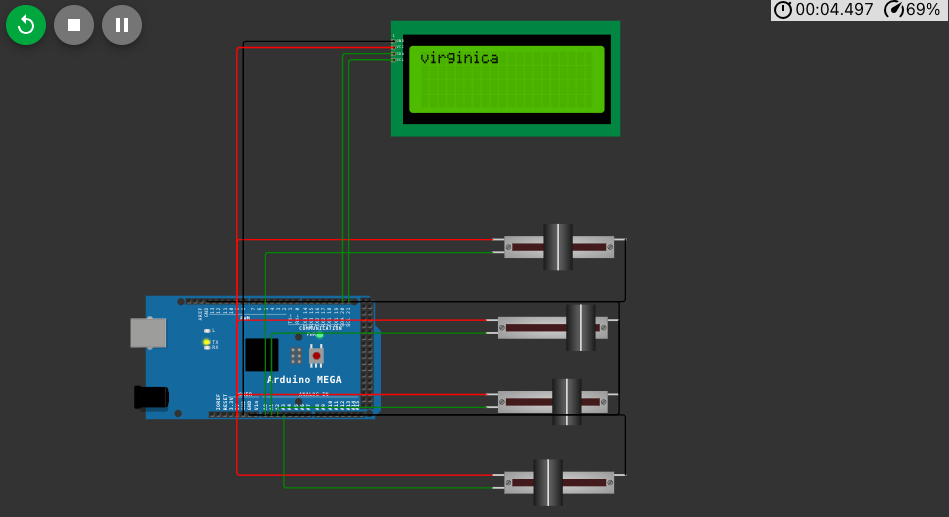